In [2]:
import json
from typing import NamedTuple
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks
from scipy.fft import fft, fftfreq
import pandas as pd

In [34]:
SAMPLING_RATE = 64 #Hz
LOW_FREQ = 10 #Hz
HIGH_FREQ = 31 #Hz

In [53]:
df = pd.read_csv('../additional_files/BVP.csv', skiprows=2, header=None)
bvp = df[0].values
bvp = np.array(bvp)
bvp = bvp[3200:3900]

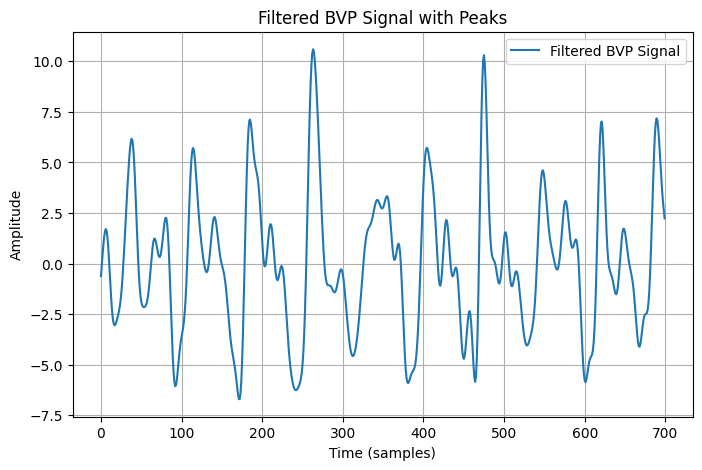

In [54]:
def bandpass_filter(signal_data, low_freq, high_freq, sampling_rate):
    nyquist_freq = 0.5 * sampling_rate
    low = low_freq / nyquist_freq
    high = high_freq / nyquist_freq
    order = 4  # Filter order
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal_data)
    return filtered_signal

# Define passband frequencies for BVP signal
low_freq = 0.5  # Lower passband frequency in Hz
high_freq = 5.0  # Upper passband frequency in Hz

filtered_bvp_signal = bandpass_filter(bvp, low_freq, high_freq, sampling_rate=SAMPLING_RATE)

peaks, _ = find_peaks(filtered_bvp_signal, height=0.5)

ibi_signal = np.diff(peaks) / SAMPLING_RATE


plt.figure(figsize=(8, 5))
plt.plot(filtered_bvp_signal, label='Filtered BVP Signal')
# plt.plot(peaks, filtered_bvp_signal[peaks], 'r.', markersize=10, label='Peaks')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Filtered BVP Signal with Peaks')
plt.legend()
plt.grid(True)
plt.show()



0.8817026893251938

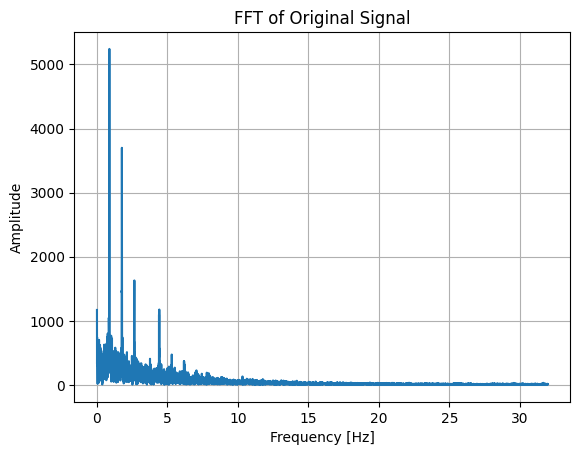

In [23]:
n = len(bvp)
frequencies = fftfreq(n, 1/SAMPLING_RATE)
fft_values = fft(bvp)
plt.plot(frequencies[:n//2], np.abs(fft_values[:n//2]))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('FFT of Original Signal')
plt.grid()
frequencies[:n//2][np.abs(fft_values[:n//2]).argmax()]